In [26]:
#Group(Divyanshu 212SP008, Sweta 212SP034)

(160, 120, 3)
Specify the number of principlal components :120
(160, 120, 3)


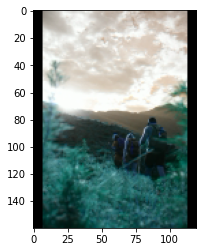

In [54]:
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import cv2
import sys
import os

# Importing image and splitting in RGB channels

a = Image.open("RawIPC.tiff")

a_np = np.array(a)
a_np.resize(160 , 120 ,3)
#plt.imshow(a_np)
print(a_np.shape)

a_b,a_g,a_r = cv2.split(np.array(a))

filesize1=os.path.getsize('/content/RawIPC.tiff')
#print("File Size is :", filesize1, "bytes")


p=len(a_np[0])

n=int(input("Specify the number of principlal components :")) #TAKING THE NUMBER OF PRINCIPAL COMPONENTS FROMTHE USER

def PCA(itbc): #function to compress and reconstruct image itbc=image to be compressed
  
  norm_mat = itbc - np.mean(itbc , axis = 0)    #taking mean along the rows
  
  eig_val, eig_vec = np.linalg.eigh(np.cov(norm_mat))  #calculating eigen values and eigen vectors
  
  idx = np.argsort(eig_val)  #sorting eigen values and eigen vectors
  
  idx = idx[::-1]           
  
  eig_vec = eig_vec[:,idx]  
  
  eig_val = eig_val[idx]
  
  l = np.size(eig_vec, axis =0)
  
  eig_vec = eig_vec[:, range(n)]  #taking the eigen vecotrs = specified principal components 
  score = np.dot(eig_vec.T, norm_mat)  #dot product 
  recon = np.dot(eig_vec, score) + np.mean(itbc, axis = 0).T
  recon_img_mat = np.uint8(recon)
  return recon_img_mat
  


if n<=p:
  
  a_bre=PCA(a_b)
  
  a_gre=PCA(a_g)
  
  a_rre=PCA(a_r)
  
  recon_color_img = np.dstack((a_rre, a_gre, a_bre)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
  #recon_color_img.resize(120,160)
  print(recon_color_img.shape)
  plt.imshow(recon_color_img)
  data=Image.fromarray(recon_color_img)
  data.save("sshm_re.tiff")
  filesize2=os.path.getsize('/content/sshm_re.tiff')
 
else:
  
  print("principal components out of range")



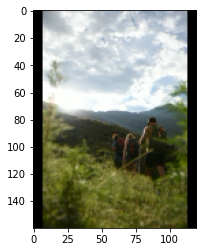

In [48]:
plt.imshow(a)

In [49]:
#compression Ratio
print(filesize1)
print(filesize2)
cr = filesize1/filesize2
print(cr)

24583676
57740
425.76508486317977


In [90]:
from skimage.metrics import structural_similarity #[SSIM function]
def struc_sim(image1, image2):
  sim , diff = structural_similarity(image1, image2 , full=True , multichannel=True)
  return sim

ssim  = struc_sim(recon_color_img , a_np)
print("Similarity using SSIM is : ",ssim)



Similarity using SSIM is :  0.8110146586493877


(120, 160, 3)


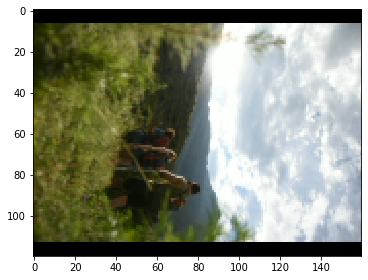

In [91]:
from skimage import io
import numpy as np
import numpy.matlib

image = io.imread('RawIPC.tiff')
print(image.shape)
io.imshow(image)
io.show()

In [92]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [93]:
K = 16 #number of clusters
max_iters = 50 #number of times the k-mean should run

In [94]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [95]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [96]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [97]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [98]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(19200,)


In [100]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(19200, 3)
(120, 160, 3)


(120, 160, 3)


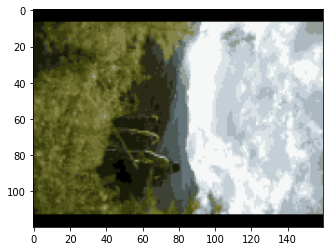

In [101]:
from PIL import Image
import matplotlib.pyplot as plt
print(X_recovered.shape)
plt.imshow(X_recovered)
data = Image.fromarray((X_recovered*255).astype(np.uint8))
data.save("re.tiff")

(120, 160, 3)


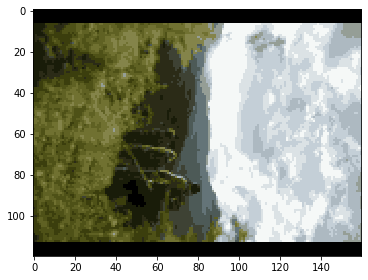

In [102]:
image_compressed = io.imread('re.tiff')
print(image_compressed.shape)
io.imshow(image_compressed)
io.show()

In [103]:
import os
info = os.stat('RawIPC.tiff')
f1 = info.st_size/1024
print("size of image before running K-mean algorithm: ",f1,"KB")
info = os.stat('re.tiff')
f2 = info.st_size/1024
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")
cr = f1/f2  #Compression Ratio
print(cr)


size of image before running K-mean algorithm:  24007.49609375 KB
size of image after running K-mean algorithm:  56.38671875 KB
425.76508486317977


In [104]:
ssim2 = struc_sim(X_recovered , image)
print(ssim2)

0.930384532425424
